### Visualisation des nouveaux exposés par zone de résidence (modèle État)

In [1]:
# 0-> 2 : 50%
debut = 0
nbTest= 2
nbStep = 50
N = 5
pointRencontre = 2
modeleEtat = "ModeleEtat3/"

from Traces import *
import numpy as np
import operator
import cPickle as pickle
import matplotlib.pyplot as plt

In [2]:
def plot_AllPropE0(m, m2, titre, titre2, rep):
    
    
    zones = m.getZones()
    zones2 = m2.getZones()
    
    labels = []
    
    li = zones.keys()
    li.sort()
    
    li2 = zones2.keys()
    li2.sort()
    
    delta = 1
    
    #pour régler l'affichage
    maxi = 0
    for idZ in li:
        Ee = zones[idZ].Ehc.values()
        Es = zones[idZ].Shc.values()
        lam = zones[idZ].lambdaVH.values()
        E0 = zones[idZ].Eh0.values()
        #E0 = [(s * l) for s, l in zip(Es, lam)]
        #maxi = max(maxi, np.max(Ee))
        maxi = max(maxi, np.max(E0))
        #print maxi
        
    for idZ in li2:
        Ee = zones[idZ].Ehc.values()
        Es = zones[idZ].Shc.values()
        lam = zones2[idZ].lambdaVH.values()
        #E0 = [(s * l) for s, l in zip(Es, lam)]
        E0 = zones2[idZ].Eh0.values()
        #maxi = max(maxi, np.max(Ee))
        maxi = max(maxi, np.max(E0))
        #print maxi
        
    mini = -delta
    maxi = maxi+delta
    
    #print mini
    #print maxi
            
    fig = plt.figure()
    fig.suptitle(titre, fontsize=12, fontweight='bold')
    for idZ in li:
        Ee = zones[idZ].Ehc.values()
        Es = zones[idZ].Shc.values()
        lam = zones[idZ].lambdaVH.values()
        #E0 = [(s * l) for s, l in zip(Es, lam)]
        E0 = zones[idZ].Eh0.values()
        #print E0
        #plt.plot(zones[idZ].Es.keys(), Ee)
        plt.plot(zones[idZ].Eh0.keys(), E0)
        labels.append("zone "+idZ+" (K="+str(zones[idZ].K[0])+")")
        
    plt.legend(labels, loc = 'best')
    plt.ylim([mini , maxi])
    fig.savefig(rep + u"E0 par zones de résidence, avec durée séjour à "+str(tauxSejour)+".png")

    fig = plt.figure()
    fig.suptitle(titre2, fontsize=12, fontweight='bold')
    for idZ in li2:
        Ee = zones2[idZ].Ehc.values()
        Es = zones2[idZ].Shc.values()
        lam = zones2[idZ].lambdaVH.values()
        #E0 = [(s * l) for s, l in zip(Es, lam)]
        E0 = zones2[idZ].Eh0.values()
        #print E0
        #plt.plot(zones[idZ].Es.keys(), Ee)
        plt.plot(zones2[idZ].Eh0.keys(), E0)
        labels.append("zone "+idZ+" (K="+str(zones[idZ].K[0])+")")
        
    plt.legend(labels, loc = 'best')
    plt.ylim([mini , maxi])
    fig.savefig(rep + u"E0 par zones de résidence, sans deplacement")
    

taux de séjour :0.5
taux de séjour :0.5


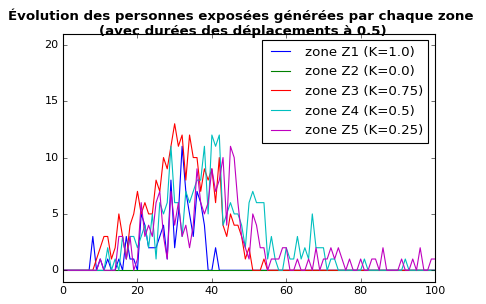

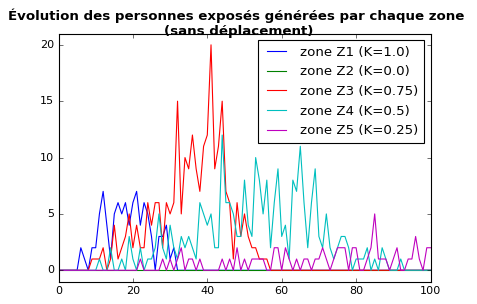

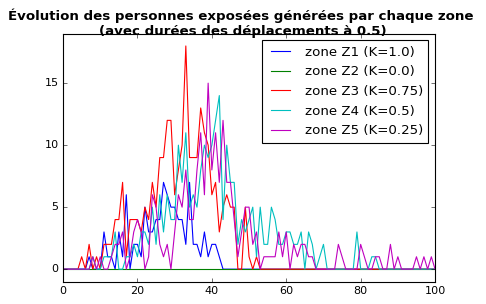

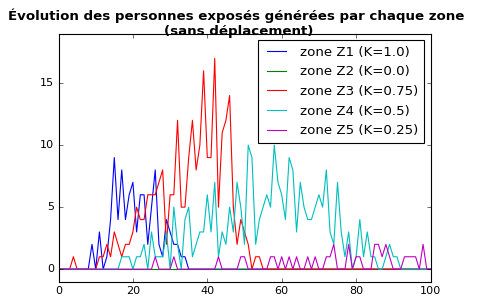

In [3]:
#%matplotlib qt
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import cPickle as pickle

#for i in range(nbTest):
for i in range(debut,nbTest,1):
#for i in range(1):
    chemin  = "./"+str(N)+"Zones"+str(pointRencontre)+"PR/test"+str(i)+"/"
    
    traces = chemin+"traces"+str(i)+".txt"
    N, M, pointRencontre, alpha, seuil, tauxSejour, residence, paternsIndividus, listIndMobiles, paths, presences, endemicites = lireTraces(traces)
    
    titre = u"Évolution des personnes exposées générées par chaque zone \n(avec durées des déplacements à "+str(tauxSejour)+")"
    titre2 = u"Évolution des personnes exposés générées par chaque zone \n(sans déplacement)"

    rep = chemin + modeleEtat

    fic1 = rep + str(N)+"zones_"+str(M)+"Individus_"+str(pointRencontre)+"pointRencontre_"+str(tauxSejour)+"deplacement.p"
    fh1 = open(fic1)
    m = pickle.load(fh1)
    fh1.close()

    fic2 = rep + str(N)+"zones_"+str(M)+"Individus_"+str(pointRencontre)+"pointRencontre_PASdeplacement.p"
    fh2 = open(fic2)
    m2 = pickle.load(fh2)
    fh2.close()

    plot_AllPropE0(m ,m2, titre, titre2, rep)



### En tenant compte d'une période T

taux de séjour :0.5
taux de séjour :0.5


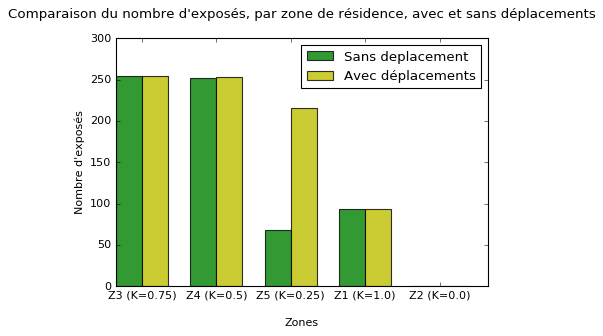

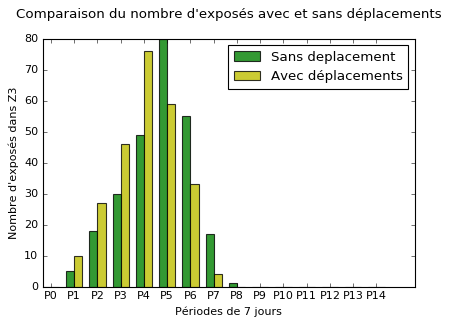

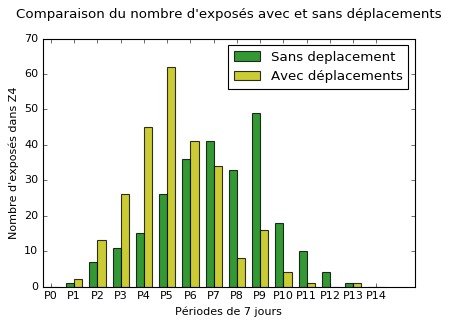

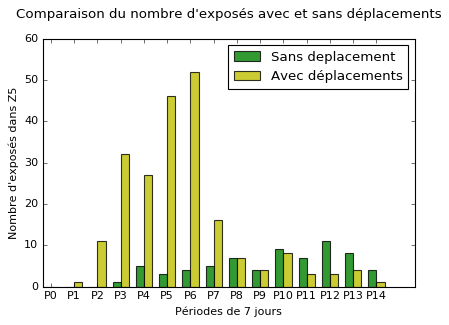

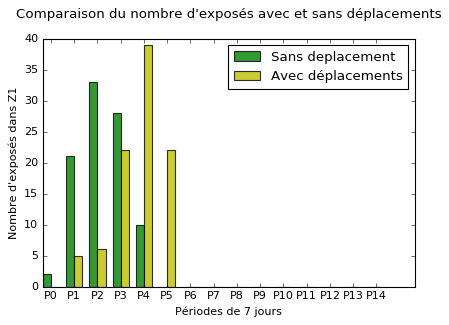

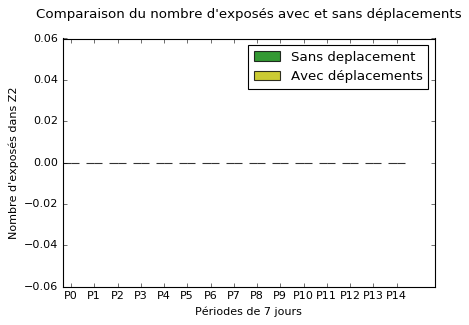

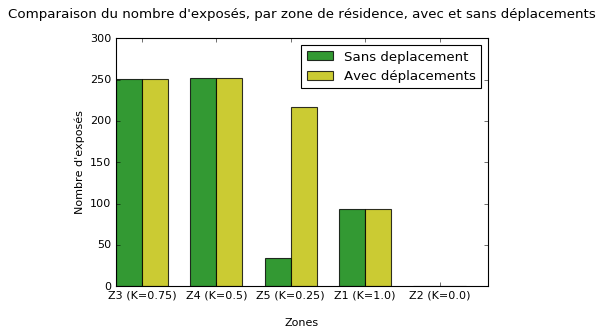

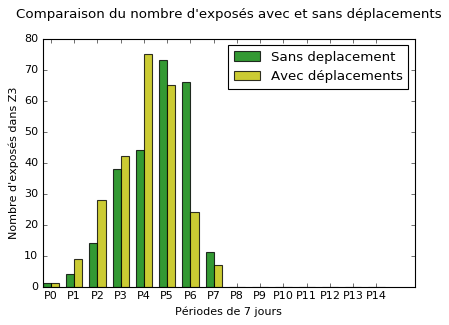

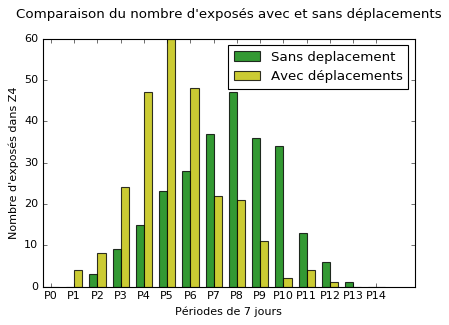

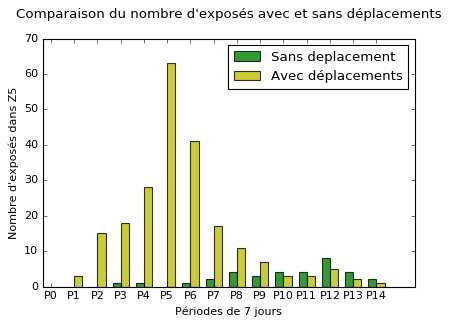

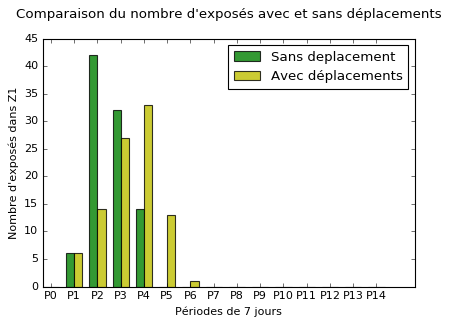

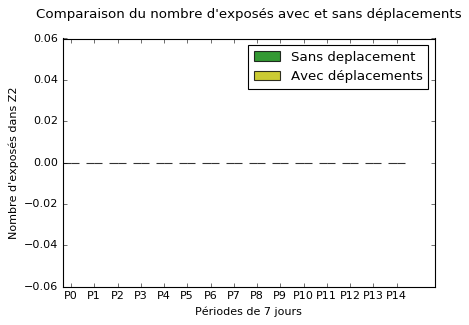

In [6]:
#%matplotlib qt
%matplotlib inline

T=7
N = 5
pointRencontre = 2
deplacement = {}
pourcentage = {}


for i in range(debut,nbTest,1):
#for i in range(1):
    chemin  = "./"+str(N)+"Zones"+str(pointRencontre)+"PR/test"+str(i)+"/"
    
    traces = chemin+"traces"+str(i)+".txt"
    N, M, pointRencontre, alpha, seuil, tauxSejour, residence[i], paternsIndividus, listIndMobiles[i], paths[i], presences[i], endemicites = lireTraces(traces)
    
    rep = chemin + modeleEtat
    
    fic1 = rep + str(N)+"zones_"+str(M)+"Individus_"+str(pointRencontre)+"pointRencontre_"+str(tauxSejour)+"deplacement.p"
    fh1 = open(fic1)
    m = pickle.load(fh1)
    fh1.close()

    fic2 = rep + str(N)+"zones_"+str(M)+"Individus_"+str(pointRencontre)+"pointRencontre_PASdeplacement.p"
    fh2 = open(fic2)
    m2 = pickle.load(fh2)
    fh2.close()

    zones = m.getZones()
    zones2 = m2.getZones()

    #contiendra zones triées dans un ordre choisi (cas sans déplacement)
    sortedZone2 = {}
    #contiendra exposés correspondant dans le cas avec déplacements
    sortedZone = {}

    for idZ in zones2.keys():
        Ee = zones2[idZ].Ehc.values()
        Es = zones2[idZ].Shc.values()
        lam = zones2[idZ].lambdaVH.values()
        #E0 = [(s * l) for s, l in zip(Es, lam)]
        E0 = zones2[idZ].Eh0.values()
        #sumEe = np.sum(Ee)
        sumEe = np.sum(E0[0:nbStep])
        sortedZone2[idZ] = sumEe
        
    '''
    print("Affichage zones avec cumul E0")
    print(sortedZone2)
    #zone2Order =sorted(zones2, key = zones2.__getitem__, reverse=True)
    zone2Order = sorted(sortedZone2.items(),key=operator.itemgetter(1), reverse=True)
    print("Affichage des zones par ordre décroissant des exposés")
    print(zone2Order)

    orderdIdZ = []
    orderdEe2 = []
    for idZ, Ee in zone2Order:
        orderdIdZ.append(idZ)
        orderdEe2.append(Ee)
    #print "liste des idz ordonnés par ordre décroissant"
    #print orderdIdZ
    '''
    #orderdIDZ est l'ordre qu'on veut imposer pour l'affichage des zones
    orderdIdZ = ['Z3', 'Z4', 'Z5', 'Z1', 'Z2']
    
    #orderdEe2 sera la liste des valeurs correspondantes à orderdIDZ
    orderdEe2 = []
    
    for idZ in orderdIdZ :
        orderdEe2.append(sortedZone2[idZ])
    #print ("Affichage orderdE2")
    #print(orderdEe2)
    
    for idZ in orderdIdZ:
        Ee = zones[idZ].Ehc.values()
        Es = zones[idZ].Shc.values()
        lam = zones[idZ].lambdaVH.values()
        #E0 = [(s * l) for s, l in zip(Es, lam)]
        E0 = zones[idZ].Eh0.values()
        #sumEe = np.sum(Ee)
        sumEe = np.sum(E0[0:nbStep])
        sortedZone[idZ] = sumEe


    sortedZone = sorted(sortedZone.items(), key=lambda pair: orderdIdZ.index(pair[0]))
    orderdEe1 = [v for k, v in sortedZone]
    #print "1 trié"
    #print(sortedZone)

    #déplacements depuis chaque zone
    origine = ['Z3', 'Z4', 'Z5']
    destination = ['Z1', 'Z2']
    
    deplacement[i] = {}
    pourcentage[i] = {}
    
    for idZ in orderdIdZ :
        deplacement[i][idZ]=0
    
    for residH in origine :
        pourcentage[i][residH] = {}
        for idZ in destination :
                pourcentage[i][residH][idZ]=0

    for idH in listIndMobiles[i] :
        residH = residence[i][idH]
                    
        for path in paths[i][idH] :
            #si deplacement
            if path[0] !=  residH :
                deplacement[i][path[0]] += path[1]
                pourcentage[i][residH][path[0]] += path[1]
            #else : #sinon
                #deplacement[i][path[0]] -= path[1]
                
                
    sortedDeplcmt = sorted(deplacement[i].items(), key=lambda pair: orderdIdZ.index(pair[0]))
    sortedDep = [v for k, v in sortedDeplcmt]
    #print "deplacements triés"
    #print sortedDep
    
    #print "deplacement test "+str(i)
    #print deplacement[i]            
    
    fig, ax = plt.subplots()
    index = np.arange(N)
    bar_width = 0.35

    rects1 = plt.bar(index, orderdEe2,  bar_width, color='g', 
        label='Sans deplacement', alpha= 0.8)
    rects2 = plt.bar(index + bar_width, orderdEe1, bar_width, color='y', 
        label=u"Avec déplacements", alpha= 0.8)

    plt.xlabel(u"Zones")
    plt.ylabel(u"Nombre d'exposés")
    plt.title(u"Comparaison du nombre d'exposés, par zone de résidence, avec et sans déplacements\n")
    
    #print len(orderdIdZ)
    #print len(sortedDep)
    
    for idZ1, p in pourcentage[i].iteritems():
        aux = dict(p)
        for idZ2, v in p.iteritems() :
            p[idZ2] = round(v/np.sum(aux.values()),2)
            
    affichage = []
    for idZ in orderdIdZ :
        if pourcentage[i].keys().__contains__(idZ) :
            detail = str( pourcentage[i][idZ])
        else :
            detail =''
        
        affichage.append(idZ+" (K="+str(zones[idZ].K[0])+")\n")#+str(deplacement[i][idZ])+"\n"+detail)
    
    
    plt.xticks(index + bar_width, affichage)
       
    plt.legend( loc = 'best' )
    
    fig.savefig(rep + u"E0 generes par zones de résidence avec et sans deplacement")
    
    '''
    fig, ax = plt.subplots()
    bar_width = 0.35
    index = np.arange(1)
    totSD = np.sum(orderdEe2)
    totAD = np.sum(orderdEe1)
    rects1 = plt.bar(index, totSD,  bar_width, color='g', alpha= 0.8)#, label='Sans deplacement')
    rects2 = plt.bar(index + bar_width, totAD, bar_width, color='y', alpha= 0.8)#, label=u"Avec déplacemnts")

    plt.xlabel(u"Zones")
    plt.ylabel(u"Nombre d'exposés")
    plt.title(u"Comparaison du nombre total d'exposés avec et sans déplacements\n")
    fig.savefig(rep + u"E0 totaux generes par zone de résidence avec et sans deplacement")
    
    affichage = []
    titre1 = u"Sans deplacement : "+str(totSD)+u" exposés   "
    titre2 = u"   Avec deplacement : "+str(totAD)+u" exposés"
    affichage.append(titre1+"     "+titre2)
    
    plt.xticks(index + bar_width, affichage)
    
    plt.legend()
    '''
    
    
    nbStep = len(zones['Z1'].Eh0.values())
    ll = np.arange(0, nbStep, T)
    orderdTEe2=[]
    #Affichage selon une période T
    for idz in orderdIdZ :
        E0 = zones2[idz].Eh0.values()
        zt = []
        for k in ll:
            zt.append(np.sum(E0[k:k+T]))
        orderdTEe2.append(zt)
    #print orderdTEe2
    
    orderdTEe1 = []
    affichage = []
    #Affichage selon une période T
    for idz in orderdIdZ :
        E0 = zones[idz].Eh0.values()
        zt = []
        t=0
        for k in ll[:-1]:
            zt.append(np.sum(E0[k:k+T]))
            #affichage.append(str(k)+"-"+str(k+T))
            affichage.append("P"+str(t))
            t+=1
        zt.append(np.sum(E0[ll[-1]:(nbStep-1)]))
        orderdTEe1.append(zt)
        #affichage.append(str(ll[-1])+"-"+str(nbStep-1))
        affichage.append("P"+str(t))
    #print orderdTEe1
    
    tt = int(np.ceil(1.0*(nbStep-1)/T))
    index2 = np.arange(tt)
    
    bar_width2 = 0.35
    k=0
    for idz in orderdIdZ :
        fig, ax = plt.subplots()
        rects1 = plt.bar(index2, orderdTEe2[k],  bar_width2, color='g', 
            label='Sans deplacement', alpha= 0.8)
        rects2 = plt.bar(index2 + bar_width2, orderdTEe1[k], bar_width2, color='y', 
            label=u"Avec déplacements", alpha= 0.8)

        plt.xlabel(u"Périodes de "+str(T)+" jours")
        plt.ylabel(u"Nombre d'exposés dans "+idz)
        plt.title(u"Comparaison du nombre d'exposés avec et sans déplacements\n")
        k = k+1
        plt.xticks(index2 + bar_width2, affichage)
    
        plt.legend()
